In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dataset/train.csv')
df.head()

,x1,x2,target
0,0.525642,0.133813,1.0
1,1.009394,0.925323,1.0
2,0.776517,-0.252655,1.0
3,-0.245693,-0.872614,0.0
4,-1.540663,-0.048947,0.0


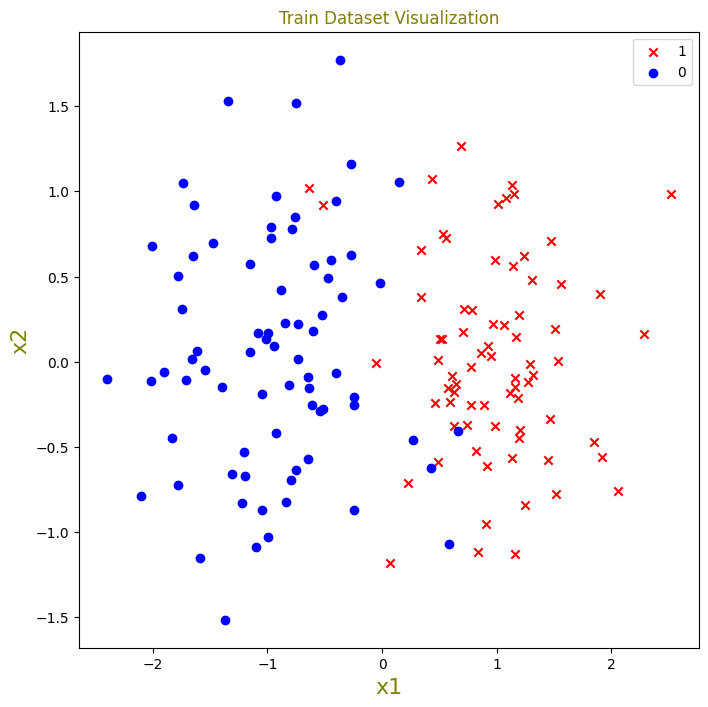

In [3]:
fig , ax = plt.subplots(figsize= (8 , 8))
ax.scatter(df[df['target'] == 1]['x1'] , df[df['target'] == 1]['x2'] , marker = 'x' ,color ='red' , label = 1)
ax.scatter(df[df['target'] == 0]['x1'] , df[df['target'] == 0]['x2'] , marker = 'o' ,color ='blue' , label=0)
ax.set_xlabel('x1' , fontsize= 16, color = 'olive')
ax.set_ylabel('x2' , fontsize = 16 , color = 'olive')
ax.set_title('Train Dataset Visualization' , fontsize= 12 , color = 'olive')
ax.legend();

In [4]:
df_minus_one = df.copy()
df_minus_one['target'] = df['target'].replace(0 , -1)
df_minus_one.head()

,x1,x2,target
0,0.525642,0.133813,1.0
1,1.009394,0.925323,1.0
2,0.776517,-0.252655,1.0
3,-0.245693,-0.872614,-1.0
4,-1.540663,-0.048947,-1.0


In [5]:
class Classification:
    def __init__(self ,df,  number_of_attrs):
        self.weights = np.random.rand(number_of_attrs + 1) # first element is bias
        self.df = df
        self.sample = df[df.columns[:-1]]
        self.target = df[df.columns[-1]]
        self.shape = self.sample.shape
        self.pocket =self.weights.copy()
        self.best_misclassified = 1e8
    def set_test(self ,df):
        self.test = df[df.columns[:-1]]
        self.target_test = df[df.columns[-1]]
        return self.test , self.target_test
    def count_misclassified(self):
        misclassified = 0
        for i in range(self.sample.shape[0]):
            perceptron_sum = np.inner(self.sample.iloc[i] , self.weights[1:])
            perceptron_sum += self.weights[0]
            if (perceptron_sum >= 0 and self.target.iloc[i] < 0) or (perceptron_sum < 0 and self.target.iloc[i] > 0):
                misclassified += 1
        return misclassified
    def train(self , MAX_ITERATION):
        for i in range(MAX_ITERATION):
            mis_cnt = self.count_misclassified()
            if mis_cnt == 0:
                self.best_misclassified = 0
                self.pocket = self.weights.copy()
                return self.pocket , self.best_misclassified
            if mis_cnt < self.best_misclassified:
                self.best_misclassified = mis_cnt
                self.pocket = self.weights.copy()
            self.weights[1:] += self.sample.iloc[i % self.shape[0]] * self.target[i % self.shape[0]]
            self.weights[0] += self.target[i % self.shape[0]]
        
        # for last iteration which is not checked in last loop
        mis_cnt = self.count_misclassified()
        if mis_cnt == 0:
            self.best_misclassified = 0
            self.pocket = self.weights.copy()
            return self.pocket , self.best_misclassified
        if mis_cnt < self.best_misclassified:
            self.best_misclassified = mis_cnt
            self.pocket = self.weights.copy()
        return self.pocket , self.best_misclassified
    def accuracy_evaluation(self):
        misclassified = 0
        for i in range(self.test.shape[0]):
            perceptron_sum = np.inner(self.test.iloc[i] , self.pocket[1:])
            perceptron_sum += self.pocket[0]
            if (perceptron_sum >= 0 and self.target_test.iloc[i] < 0) or (perceptron_sum < 0 and self.target_test.iloc[i] > 0):
                misclassified += 1
        return (misclassified , ((self.test.shape[0] - misclassified) / self.test.shape[0])*100)

In [27]:
NUM_OF_ITERATIONS = 300
c = Classification(df_minus_one , 2)
pocket , best_misclassified = c.train(NUM_OF_ITERATIONS)
print(f'The best weights after {NUM_OF_ITERATIONS} iterations  is : W0 = {pocket[0]} , W1  = {pocket[1]} , W2 = {pocket[2]}')
print(f'The least misclassifications on train dataset is : {best_misclassified}')

The best weights after 300 iterations  is : W0 = -2.0721736514927294 , W1  = 29.46059048652938 , W2 = -9.33791948293127
The least misclassifications on train dataset is : 7


In [28]:
df_test = pd.read_csv('Dataset/test.csv')
df_test.head()

,x1,x2,target
0,-0.723805,0.798472,0.0
1,1.393432,-0.617441,1.0
2,1.018925,0.970799,1.0
3,0.934384,0.568916,1.0
4,1.218155,0.393373,1.0


In [29]:
c.set_test(df_test)
num_of_misclassified , accuracy = c.accuracy_evaluation()[0] , c.accuracy_evaluation()[1]
print(f'The number of Misclassifications is : {num_of_misclassified}\n and the Accuracy of perceptron model on test dataset is : {accuracy} %')

The number of Misclassifications is : 1
 and the Accuracy of perceptron model on test dataset is : 98.0 %


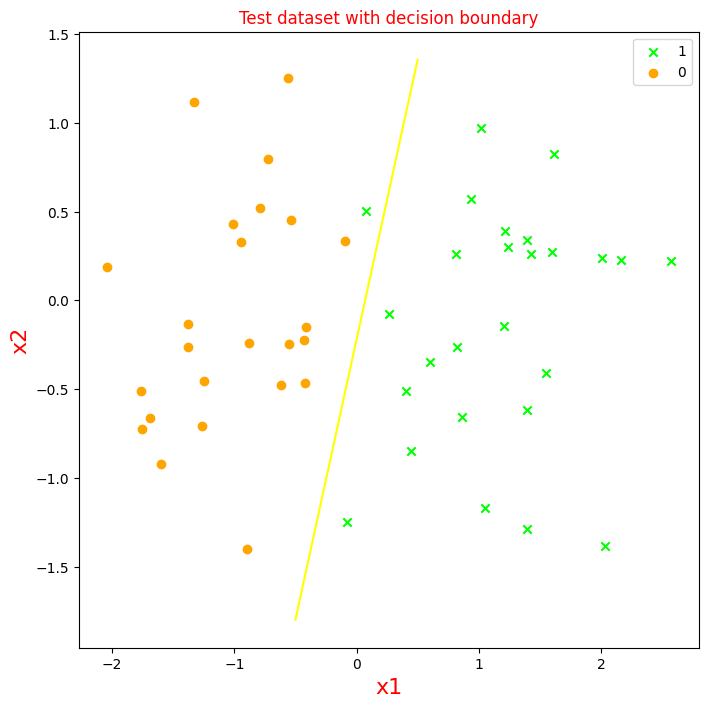

In [32]:
x1 = np.linspace(-0.5 , 0.5 , 50)
x2 = ((-pocket[1]/pocket[2]) * x1) - pocket[0] / pocket[2]
fig2 , ax2 = plt.subplots(figsize= (8 , 8))
ax2.plot(x1 , x2  , color = 'yellow')
ax2.scatter(df_test[df_test['target'] == 1]['x1'] , df_test[df_test['target'] == 1]['x2'] , marker = 'x' ,color ='lime' , label = 1)
ax2.scatter(df_test[df_test['target'] == 0]['x1'] , df_test[df_test['target'] == 0]['x2'] , marker = 'o' ,color ='orange' , label=0)
ax2.set_xlabel('x1' , fontsize= 16, color = 'red')
ax2.set_ylabel('x2' , fontsize = 16 , color = 'red')
ax2.set_title('Test dataset with decision boundary' , fontsize= 12 , color = 'red')
ax2.legend();

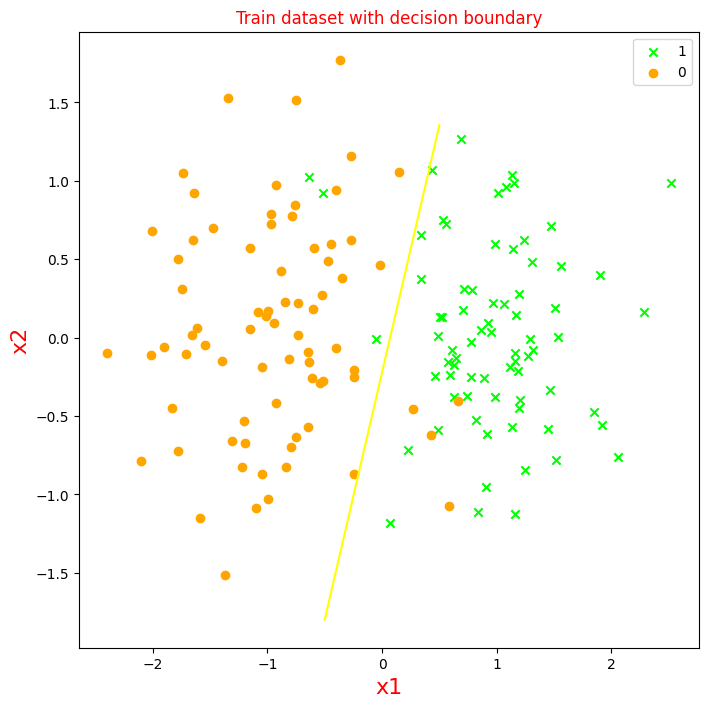

In [33]:
fig3 , ax3 = plt.subplots(figsize= (8 , 8))
ax3.plot(x1 , x2  , color = 'yellow')
ax3.scatter(df[df['target'] == 1]['x1'] , df[df['target'] == 1]['x2'] , marker = 'x' ,color ='lime' , label = 1)
ax3.scatter(df[df['target'] == 0]['x1'] , df[df['target'] == 0]['x2'] , marker = 'o' ,color ='orange' , label=0)
ax3.set_xlabel('x1' , fontsize= 16, color = 'red')
ax3.set_ylabel('x2' , fontsize = 16 , color = 'red')
ax3.set_title('Train dataset with decision boundary' , fontsize= 12 , color = 'red')
ax3.legend();